# Back-Order-Prediction
## Problem Statement

A backorder is the order which could not be fulfilled by the company. Due to high demand of a product, the company was not able to keep up with the delivery of the order. The backordering can lead to upsetting customer as they couldn't get what they ordered and the loyalty will decrease.
Also, company cannot overstock every product in their inventory to avoid such situation.
There has to be a way for the company to know for which products they can face this problem.
So, the company has shared a data file with different input features for each product and it hopes to find a pattern inside this data which can give them some insight.
The data file contains the historical data for some weeks prior to the week we are trying to predict. 

##### Data Set
The data has 23 columns including 22 features and one target column.
To model and predict the target, we’ll use the features columns, which are:
1. sku – 		 	Random ID for the product
2. national_inv –   	Current inventory level for the part
3. lead_time – 	 	Transit time for product (if available)
4. in_transit_qty – 	Amount of product in transit from source
5. forecast_3_month – 	Forecast sales for the next 3 months
6. forecast_6_month – 	Forecast sales for the next 6 months
7. forecast_9_month – 	Forecast sales for the next 9 months
8. sales_1_month – 	Sales quantity for the prior 1 month time period
9. sales_3_month – 	Sales quantity for the prior 3 month time period
10. sales_6_month – 	Sales quantity for the prior 6 month time period
11. sales_9_month – 	Sales quantity for the prior 9 month time period
12. min_bank – 		Minimum recommend amount to stock
13. potential_issue – 	Source issue for part identified
14. pieces_past_due – 	Parts overdue from source
15. perf_6_month_avg – 	Source performance for prior 6 month period
16. perf_12_month_avg – 	Source performance for prior 12 month period
17. local_bo_qty – 		Amount of stock orders overdue
18. deck_risk – 		Part risk flag
19. oe_constraint – 	Part risk flag
20. ppap_risk – 		Part risk flag
21. stop_auto_buy – 	Part risk flag
22. rev_stop – 		Part risk flag
23. went_on_backorder – 	Product actually went on backorder. This is the target value.

__Import all the necessary libraries__

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [29]:
df = pd.read_csv('Training_Dataset_v2.csv') # Import the dataset
df.head()

c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
df.columns #Know the columns that are present

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [4]:
print("The dimension of the given data-set is :",df.shape) # Know the Dimension

The dimension of the given data-set is : (1687861, 23)


In [5]:
df.isna().sum() #count the total number of null values in each columns

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [6]:
df.info() # Understand the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

In [7]:
df.went_on_backorder.value_counts() # Count of backorders

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [8]:
(df['went_on_backorder'].value_counts()/df['went_on_backorder'].count())*100

No     99.330928
Yes     0.669072
Name: went_on_backorder, dtype: float64

## Observations from the dataset
1. Class imbalance (Only 0.67% volume of products went on back order)
2. lead_time has NA values
3. Last Row has all NA values
4. Remove sku (all unique values)
5. perf_6_month_avg, perf_12_month_avg attributes have missing data with -99 values.

## PREPROCESSING

In [30]:
str_col = ["potential_issue","deck_risk","oe_constraint","ppap_risk","stop_auto_buy","rev_stop","went_on_backorder"]

In [31]:
for col in str_col:    #Yes => 1 and No => 0 
    df[col] = df[col].map({'Yes':1,'No':0})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null float64
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null float64
oe_constraint        1687860 non-null float64
ppap_risk     

In [33]:
df.describe() #there is no column with standard devation 0. Its good to go!!!

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,...,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,...,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,2.295706e-01,1.451542e-04,1.207648e-01,9.638086e-01,4.330928e-04,6.690721e-03
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,...,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,4.205568e-01,1.204713e-02,3.258538e-01,1.867661e-01,2.080638e-02,8.152275e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,...,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [34]:
df = df.dropna() #NaN values are only present in lead_time columns, we can drop them 

In [35]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,1.0,0.0,1.0,1.0,0.0,0.0
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,...,0.0,0.85,0.90,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,1.0,0.0,0.0,1.0,0.0,0.0
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
X = df.drop(["went_on_backorder","sku"],axis=1)

In [38]:
y = df['went_on_backorder']

In [23]:
#Correlation - help to find multicollenarity in the dataset

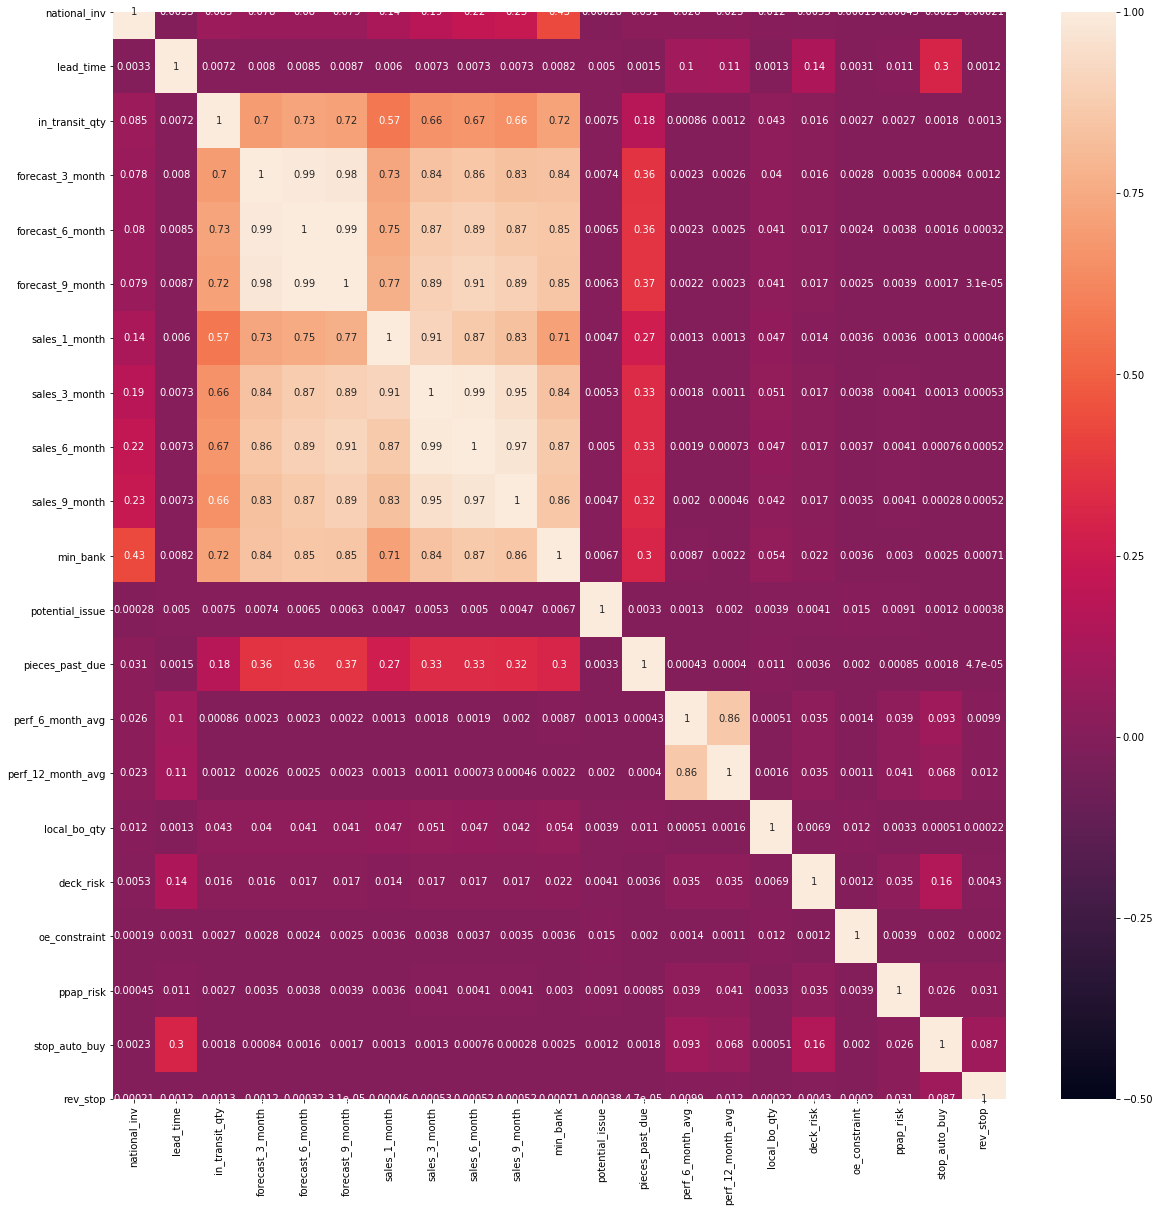

In [24]:
plt.figure(figsize=(20,20))
plt_data =X_scaled
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [45]:
X_new = X.drop(columns=['forecast_6_month','forecast_9_month','sales_3_month','sales_6_month','sales_1_month'])

In [46]:
X_new

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0,0.0,0.0,0.0,1.0,0.0
3,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.10,0.13,0.0,0.0,0.0,0.0,1.0,0.0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.87,0.0,0.0,0.0,0.0,1.0,0.0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.0,0.0,1.0,1.0,0.0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.87,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,124.0,8.0,140.0,410.0,1074.0,111.0,0.0,0.0,0.85,0.90,1.0,0.0,0.0,0.0,1.0,0.0
1687855,0.0,2.0,0.0,10.0,7.0,0.0,0.0,0.0,0.69,0.69,5.0,1.0,0.0,0.0,1.0,0.0
1687857,-1.0,9.0,0.0,7.0,12.0,0.0,0.0,0.0,0.86,0.84,1.0,1.0,0.0,0.0,0.0,0.0
1687858,62.0,9.0,16.0,39.0,205.0,12.0,0.0,0.0,0.86,0.84,6.0,0.0,0.0,0.0,1.0,0.0


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,y, test_size= 0.3, random_state = 0)

In [52]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\win10\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr.score(x_test,y_test)

0.9930055388570672

In [58]:
classifier.score(x_test,y_test)

0.9943246144119506

In [53]:
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [73]:
df.loc[1687813]

sku                  1497858
national_inv               0
lead_time                  2
in_transit_qty             0
forecast_3_month         126
forecast_6_month         126
forecast_9_month         126
sales_1_month              0
sales_3_month              0
sales_6_month              0
sales_9_month              0
min_bank                   0
potential_issue            0
pieces_past_due            0
perf_6_month_avg        0.92
perf_12_month_avg       0.86
local_bo_qty               4
deck_risk                  1
oe_constraint              0
ppap_risk                  0
stop_auto_buy              1
rev_stop                   0
went_on_backorder          1
Name: 1687813, dtype: object

In [74]:
X_new.loc[1687813]

national_inv           0.00
lead_time              2.00
in_transit_qty         0.00
forecast_3_month     126.00
sales_9_month          0.00
min_bank               0.00
potential_issue        0.00
pieces_past_due        0.00
perf_6_month_avg       0.92
perf_12_month_avg      0.86
local_bo_qty           4.00
deck_risk              1.00
oe_constraint          0.00
ppap_risk              0.00
stop_auto_buy          1.00
rev_stop               0.00
Name: 1687813, dtype: float64

In [75]:
classifier.predict([[0,2,0,126,0,0,0,0,0.92,0.86,4,1,0,0,1,0]])

array([1.])